In [36]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
pyplot.rcParams['figure.dpi'] = 75 # cambiar a un valor más alto al armar la presentación

# Exploración y creacion del dataset

In [37]:
from sklearn import datasets    # Solo lo usamos para obtener los datos
digits = datasets.load_digits()

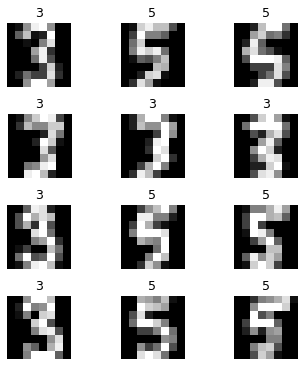

In [38]:
indices = [i for i, y in enumerate(digits.target) if y in [5, 3]] # TODO probar diferentes combinaciones
fig, ax = plt.subplots(4, 3, figsize=(5, 5))

for i in range(4):
    for j in range(3):
        ind = np.random.choice(indices)

        ax[i, j].imshow(digits.data[ind].reshape(8, 8), cmap="gray")
        ax[i, j].set_title(digits.target[ind])
        ax[i, j].axis("off")

plt.tight_layout()
plt.show()

In [39]:
# Guardo dataset en data/
# np.savetxt("../data/mnist_x.txt", digits.data, fmt="%.0f")
# np.savetxt("../data/mnist_y.txt", digits.target, fmt="%.0f")

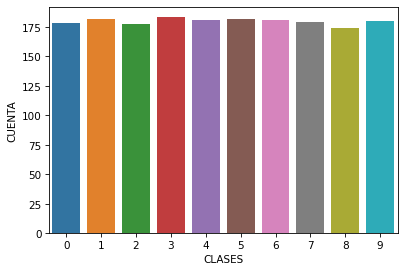

In [40]:
# Verificamos que se pueda leer el archivo realizado
target = np.loadtxt("../data/mnist_y.txt").astype(int)

df = pd.DataFrame(target, columns=["CLASES"])
p = sns.countplot(data=df, x="CLASES")
plt.ylabel("CUENTA")
plt.show()

# Variación de optimizadores

In [41]:
folders = [
    "../out/ejercicio_4_config00_sgd",
    "../out/ejercicio_4_config01_momentum",
    "../out/ejercicio_4_config02_rmsprop",
    "../out/ejercicio_4_config03_adagrad",
    "../out/ejercicio_4_config04_adam",
]

dfs = []
for folder in folders:
    for i in range(10):
        filename = os.path.join(folder, "corrida_{}.csv".format(i))
        df = pd.read_csv(filename)
        df["CORRIDA"] = i
        df["OPTIMIZADOR"] = folder.split("_")[-1]
        dfs.append(df)
data = pd.concat(dfs)
data = data.reset_index(drop=True)

## Perdidas por epoch

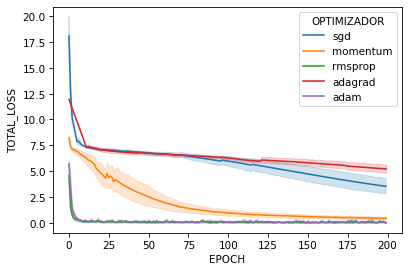

In [42]:
train_data = data[(data.CLASE == 0)].dropna()
sns.lineplot(data=train_data, x="EPOCH", y="TOTAL_LOSS", hue="OPTIMIZADOR")
plt.show()

## Tiempo de entrenamiento

[]

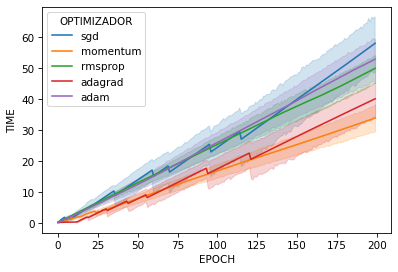

In [43]:
train_data["TIME"] = train_data.groupby(["CORRIDA", "OPTIMIZADOR"])["EPOCH_TIME"].cumsum()
sns.lineplot(data=train_data, x="EPOCH", y="TIME", hue="OPTIMIZADOR")
plt.plot()

## Accuracy por clase y por optimizador

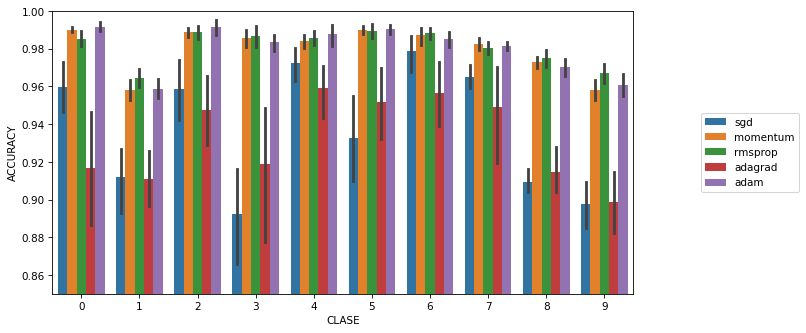

In [44]:
test_data = data[(data.INSTANCIA == "TEST")]
plt.figure(figsize=(10, 5))
sns.barplot(data=test_data, x="CLASE", y="ACCURACY", hue="OPTIMIZADOR")
plt.ylim(0.85, 1.0)
plt.legend(bbox_to_anchor=[1.2, 0.5], loc='center')
plt.show()

In [45]:
test_data.pivot_table("ACCURACY", "CLASE", "OPTIMIZADOR").mean()

OPTIMIZADOR
adagrad     0.932368
adam        0.980056
momentum    0.979666
rmsprop     0.981114
sgd         0.937939
dtype: float64

## Matriz de confusion

[]

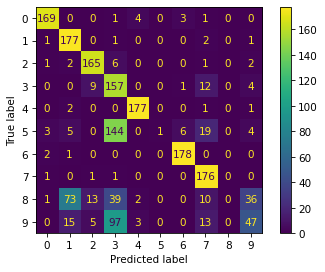

In [46]:
from nn import NN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

try:
    os.chdir("..")
    nn = NN.load("out/ejercicio_4_config00_sgd/corrida_0.pickle")
finally:
    os.chdir("src")

x = np.loadtxt("../data/mnist_x.txt").astype(int)
y = np.loadtxt("../data/mnist_y.txt").astype(int)

y_hat = nn.predict(x)

cnf = confusion_matrix(y, y_hat)
disp = ConfusionMatrixDisplay(cnf)
disp.plot()
plt.plot()

# Variacion de Leraning Rate y Batch size

In [47]:
folders = [
    "../out/ejercicio_4_sgd_lr 0.1 bs 1",
    "../out/ejercicio_4_sgd_lr 0.1 bs 10",
    "../out/ejercicio_4_sgd_lr 0.01 bs 10",
    "../out/ejercicio_4_sgd_lr 1.0 bs 100",
]

dfs = []
for folder in folders:
    for i in range(10):
        filename = os.path.join(folder, "corrida_{}.csv".format(i))
        df = pd.read_csv(filename)
        df["CORRIDA"] = i
        df["PARAMETROS"] = folder.split("_")[-1]
        dfs.append(df)
data = pd.concat(dfs)
data = data.reset_index(drop=True)

## Perdidas por epoch

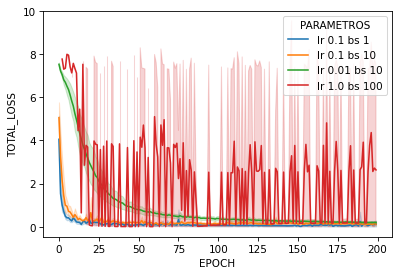

In [48]:
train_data = data[(data.CLASE == 0)].dropna()
sns.lineplot(data=train_data, x="EPOCH", y="TOTAL_LOSS", hue="PARAMETROS")
plt.show()